In [1]:
# for everything

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# for random forest

from sklearn.ensemble import RandomForestRegressor

In [2]:
rawdat = pd.read_csv('../1500_samples.csv')
len(rawdat)


dat = rawdat.copy()
dat.tail()


dat = dat[(dat['n_hill1'] == 1000)]

train_dat = dat.sample(frac = 0.7, replace = False, random_state = 0)

test_dat = dat.drop(train_dat.index)

train_X = train_dat[['richness', 'abundance']]
train_Y = train_dat[['mean', 'sd']]


test_X = test_dat[['richness', 'abundance']]
test_Y = test_dat[['mean', 'sd']]

In [3]:
test_results = {}

rf_mean = RandomForestRegressor()
rf_mean.fit(train_X, train_Y['mean'])
test_results['rf_mean_r2'] = rf_mean.score(test_X, test_Y['mean'])

rf_sd = RandomForestRegressor()
rf_sd.fit(train_X, train_Y['sd'])
test_results['rf_sd_r2'] = rf_sd.score(test_X, test_Y['sd'])

In [4]:
test_results

{'rf_mean_r2': 0.99865539616194, 'rf_sd_r2': 0.9960271496521986}

In [5]:
rf_test_preds = test_X.copy()
rf_test_preds['rf_sd'] = rf_sd.predict(test_X)
rf_test_preds['rf_mean'] = rf_mean.predict(test_X)

In [6]:
rf_test_preds.tail()

,richness,abundance,rf_sd,rf_mean
1452,196,12312,7.822707,108.688082
1454,197,3982,9.899900,86.604866
1455,197,7744,8.739784,101.148156
1462,198,3541,10.196367,86.113329
1471,200,11334,7.998836,107.050793


In [7]:
# rf_test_preds.to_csv("random_forest_predictions.csv")

original_samples = rawdat = pd.read_csv('../1500_samples_raw.csv')
original_samples = original_samples[["richness", "abundance", "hill1"]]


In [8]:
def draw_from_normal(mean, sd):
    draws = np.random.default_rng().normal(mean, sd, 1000)
    return(draws)
    
def sample_a_row(a_row_of_x, orig_samples):
    s = a_row_of_x[1]
    n = a_row_of_x[2]
    draws = sorted(draw_from_normal(a_row_of_x[4], a_row_of_x[3]))
    orig_samples_matched = orig_samples.loc[(orig_samples['richness'] == s) & (orig_samples['abundance'] ==n)]
    x_samples = {"sampled_hill": draws,
                "richness": np.repeat(s, 1000),
                "abundance": np.repeat(n, 1000)}
    x_samples = pd.DataFrame(data=x_samples)
    x_samples["hill1"] = (orig_samples_matched[['hill1']].values)
    x_samples['hill1'] = sorted(x_samples['hill1'])
    x_samples['abundance_string'] = 

    return(x_samples)

In [31]:
short_test_preds = rf_test_preds.sample(frac=.03, replace = False, random_state = 0)

short_test_preds

,richness,abundance,rf_sd,rf_mean
733,97,9863,4.157677,60.248513
1166,156,14779,6.080429,92.961695
852,112,19040,4.286596,70.697996
1080,145,9418,6.211498,84.090279
171,22,16256,1.523865,14.853177
41,7,2583,0.791261,4.988949
563,76,622,5.919574,41.161108
955,128,16041,4.903859,79.240718
925,124,4923,6.144148,70.390781
1077,145,2003,8.669534,65.519074


In [10]:
sampled_df = pd.DataFrame()


for row in rf_test_preds.itertuples():
    sampled_df = pd.concat([sampled_df, (sample_a_row(row, orig_samples = original_samples.copy()))])
    


In [32]:
sampled_df_short = pd.DataFrame()


for row in short_test_preds.itertuples():
    sampled_df_short = pd.concat([sampled_df_short, (sample_a_row(row, orig_samples = original_samples.copy()))])
    


In [33]:


sampled_df_short.head()

,sampled_hill,richness,abundance,hill1
0,47.645557,97,9863,45.236009
1,49.353500,97,9863,47.480952
2,50.215784,97,9863,48.228654
3,50.320622,97,9863,48.327336
4,50.545476,97,9863,49.076579


In [34]:
type(sampled_df_short[['hill1']])

pandas.core.frame.DataFrame

In [13]:
# sampled_df.to_csv("rf_and_fs_samples.csv")

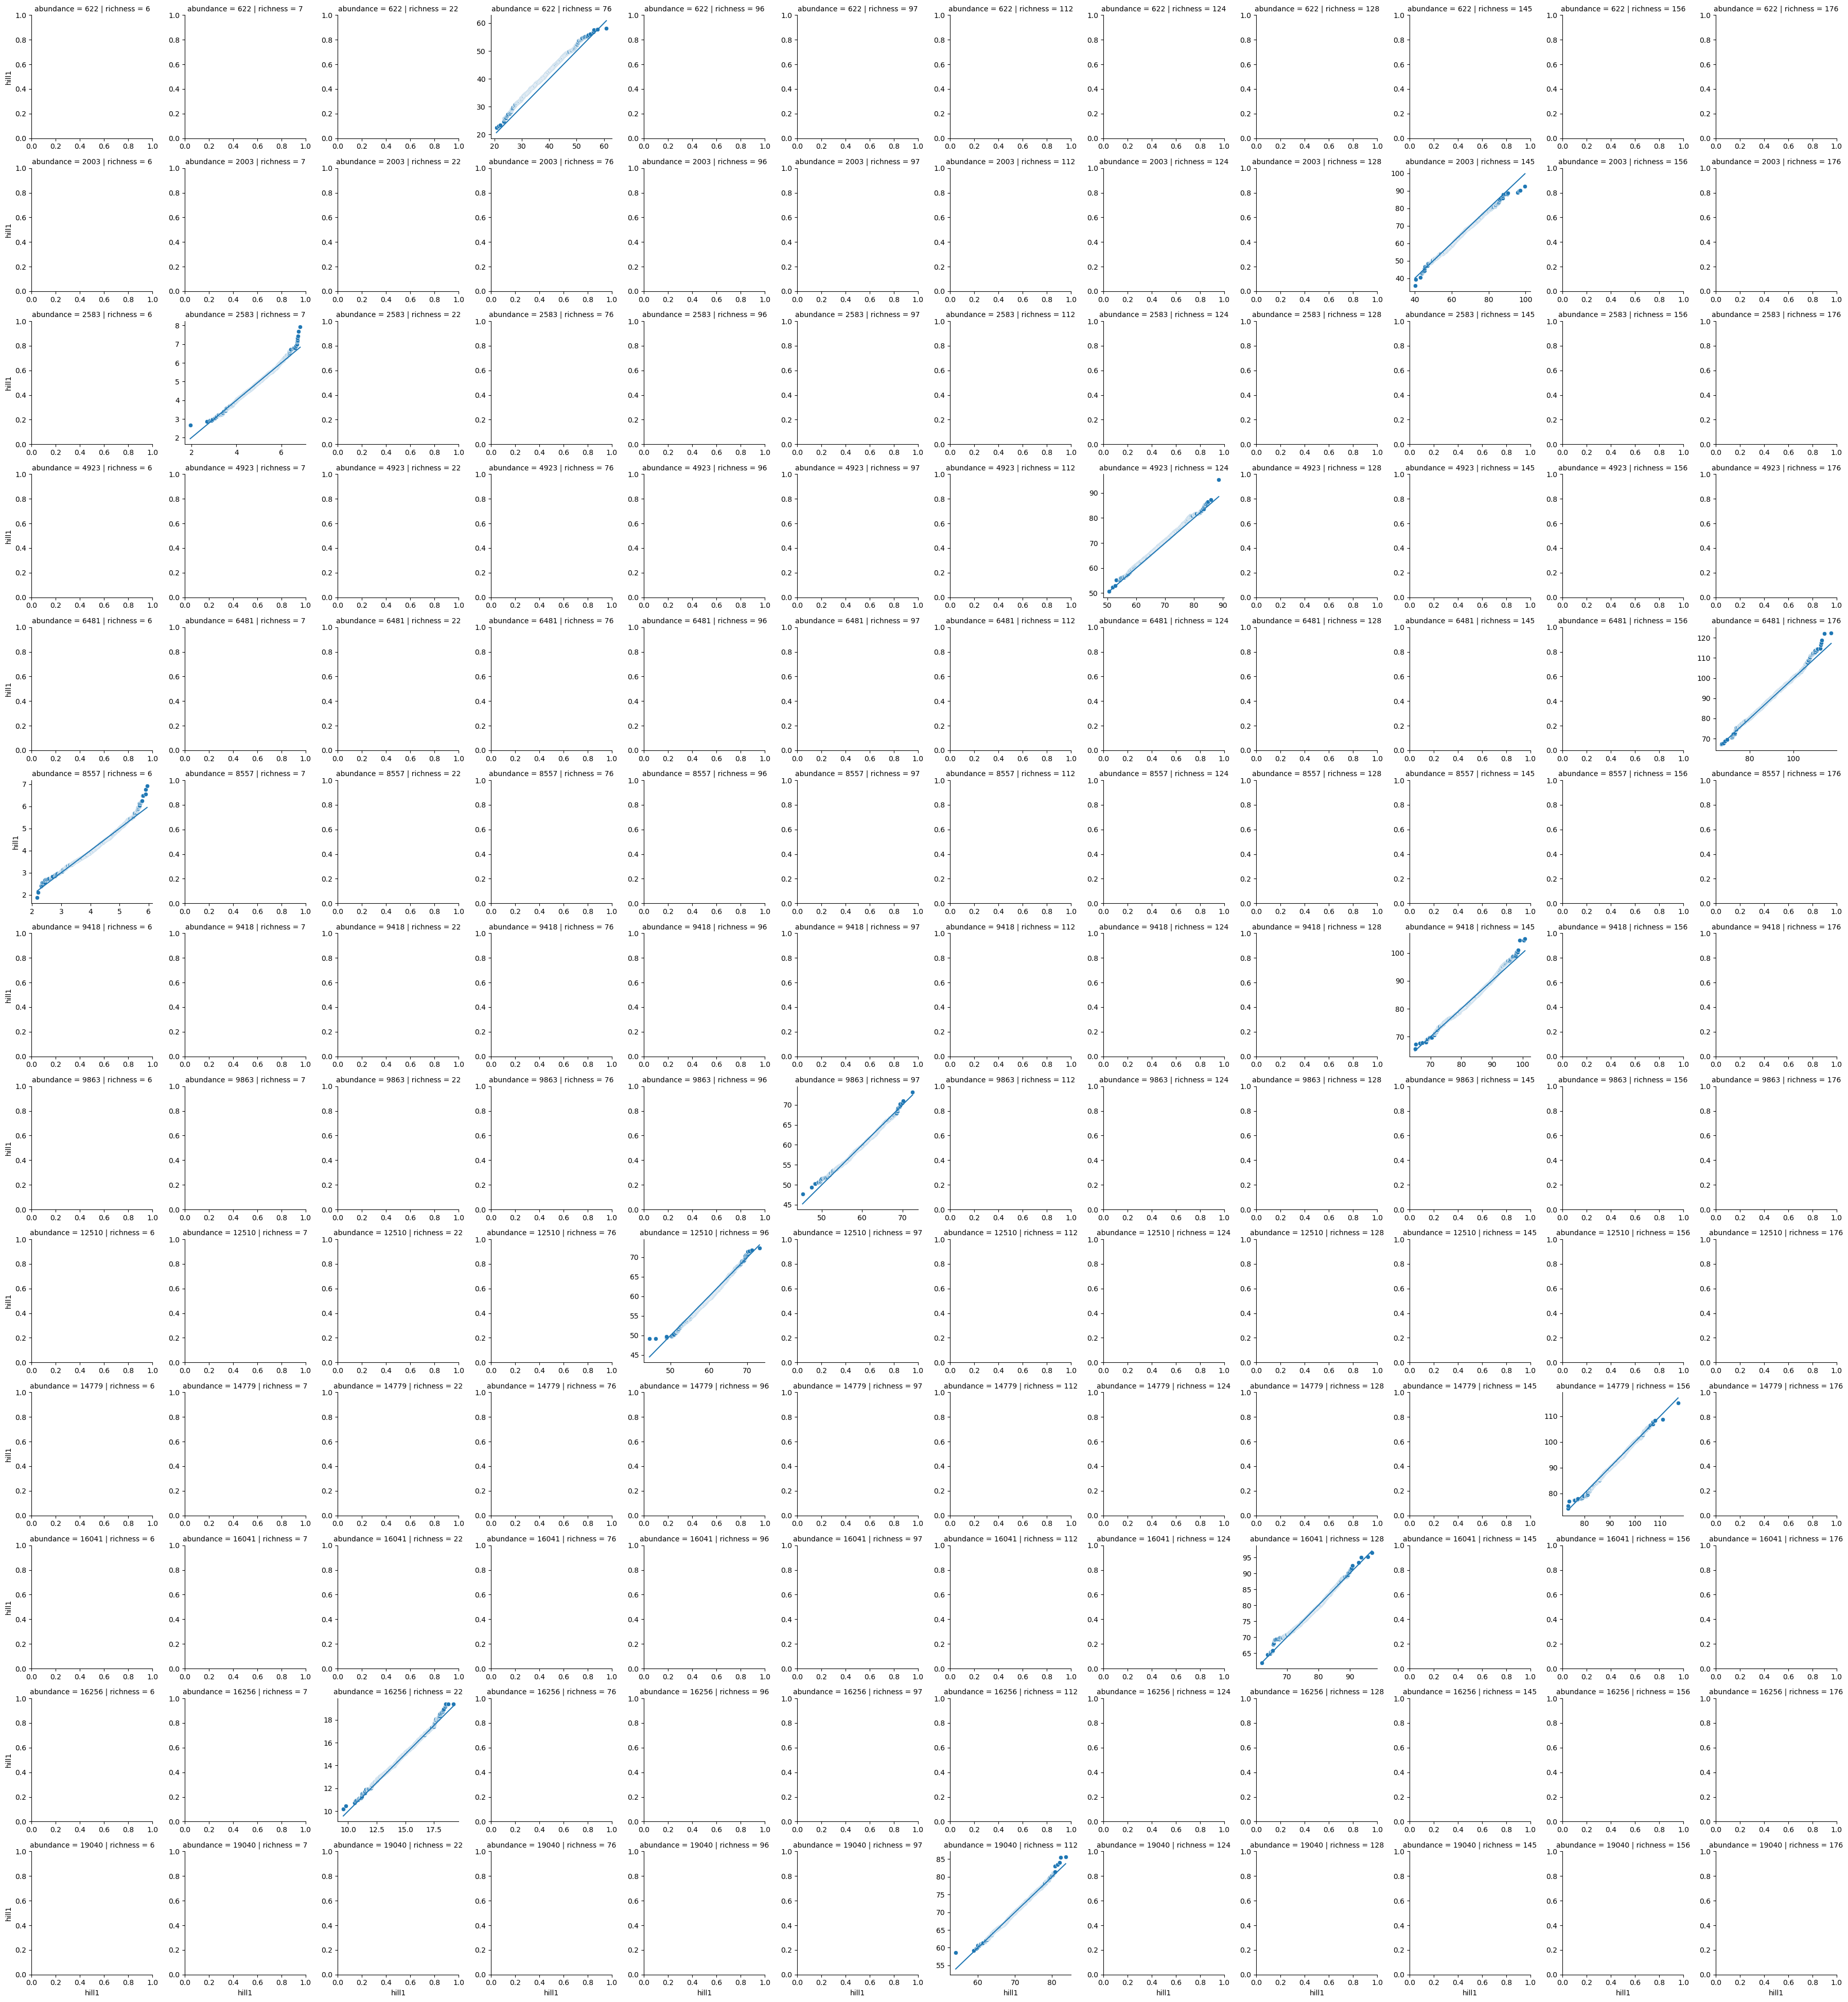

In [56]:
fg = sns.FacetGrid(sampled_df_short, col = "richness", row = "abundance", dropna = True, sharex = False, sharey = False)

fg.map(sns.scatterplot, "hill1", "sampled_hill")
fg.map(sns.lineplot, "hill1", "hill1")

In [51]:
sampled_df_short["richness_string"] = sampled_df_short.richness
sampled_df_short["abundance_string"] = sampled_df_short.abundance

sampled_df_short.richness_string = sampled_df_short.richness.astype(str)
sampled_df_short.abundance_string = sampled_df_short.abundance.astype(str)


In [52]:
sampled_df_short.head()

,sampled_hill,richness,abundance,hill1,richness_string,abundance_string
0,47.645557,97,9863,45.236009,97,9863
1,49.353500,97,9863,47.480952,97,9863
2,50.215784,97,9863,48.228654,97,9863
3,50.320622,97,9863,48.327336,97,9863
4,50.545476,97,9863,49.076579,97,9863


ValueError: operands could not be broadcast together with shapes (169000,) (13000,) 

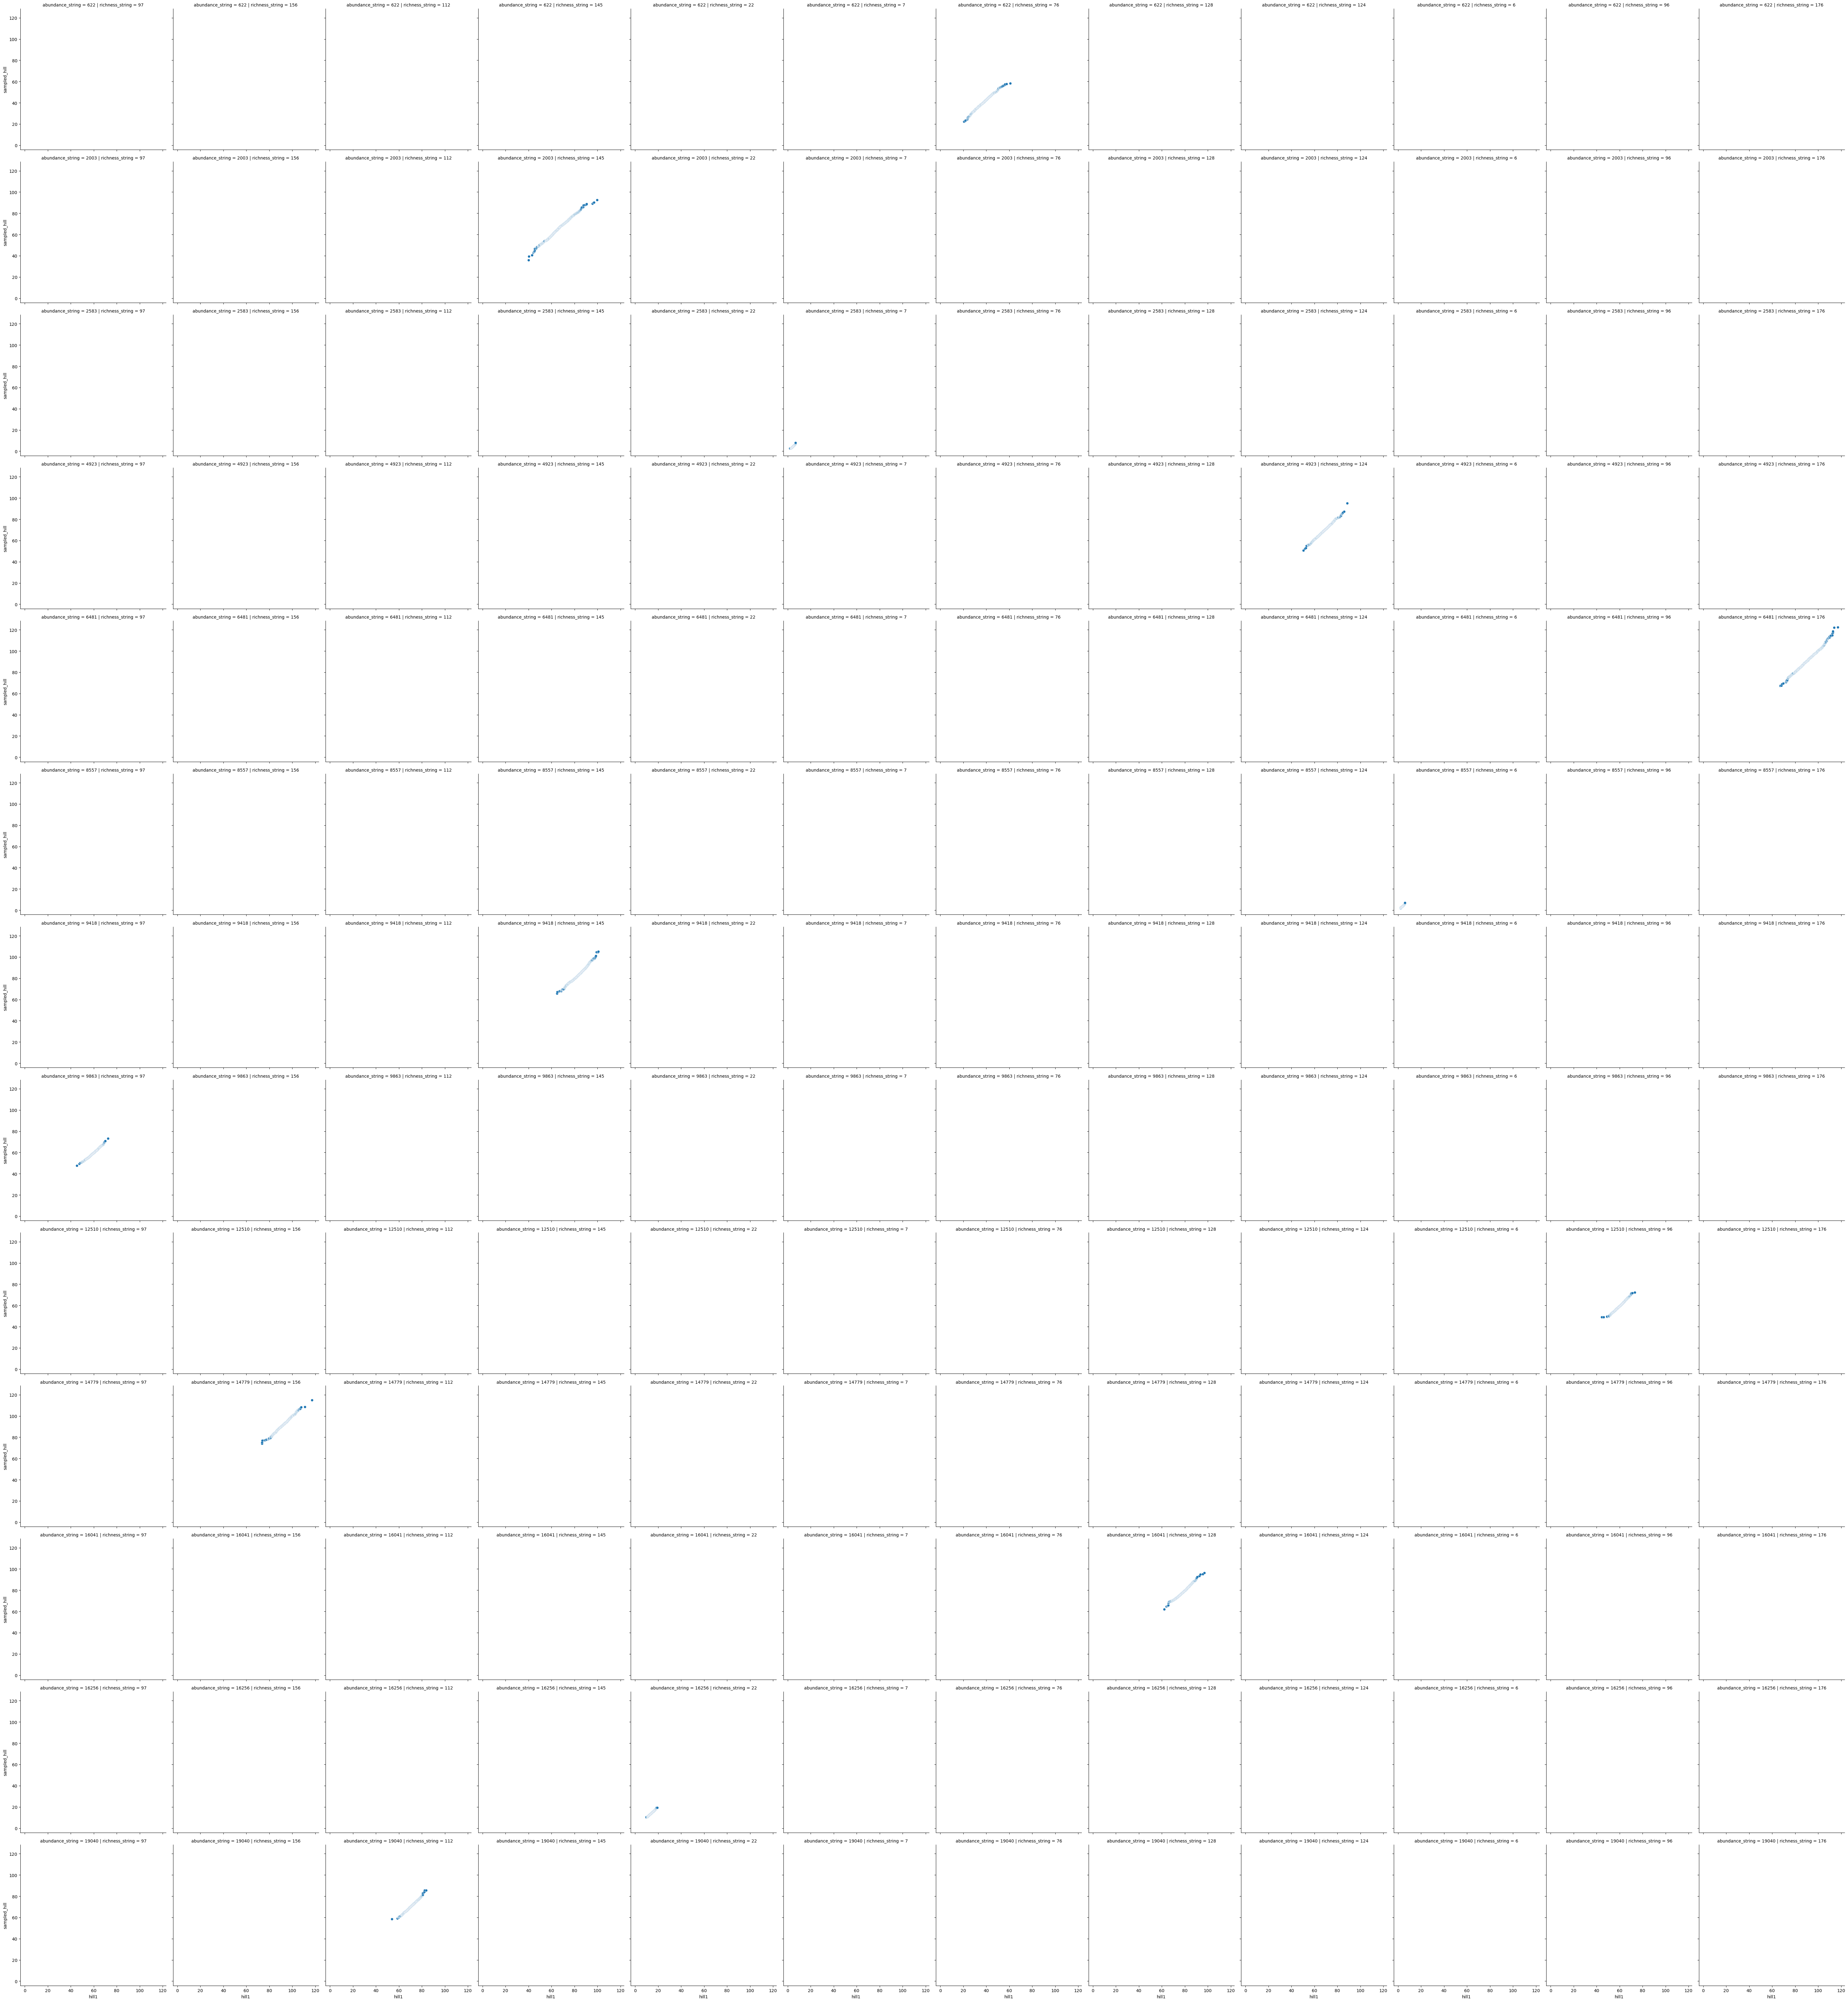

In [55]:
rp = sns.relplot(data = sampled_df_short, x = "hill1", y = "sampled_hill", col = "richness_string", row = "abundance_string")


In [ ]:
rp